<a href="https://colab.research.google.com/github/SichenPa221/ATSI/blob/main/td_reseaux_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD Neural networks

## Objectives

The objectives of this practical session are:
- The understanding of neural network features
- The introduction to the neural network library PyTorch
- The creation of a simple neural network for classification
- The implementation or usage of metrics and visualization tools to evaluate the performance of the training

It includes the implementation of:

- The neural network description
- The optimization loop
- The test and evaluation phases

# Understanding of neural networks

We will make use of the demonstration [playground applet](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.57064&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false&numHiddenLayers_hide=false&regularizationRate_hide=true&regularization_hide=true) provided by Tensorflow (the other Deep Learning framework).

<img src=https://datacorner.fr/wp-content/uploads/2020/09/tensorflow-playground.png />

There are several parameters that characterize a neural network learning strategy.

## Activity 1: the applet

Identify in the applet the parameters that characterize:
- Data
- Learning
- Architecture
- Optimization
- Evaluation

## Activity 2: XOR distribution (top-right)

We are going to use the applet to solve the classification problem of the "XOR" shape distribution (top-right distribution). In principle, a one layer network with two hidden neurons can solve the classification of ths kind of distribution (see course).

1. Define the 1 hidden - 2 neuron layer network with ReLU activation in the applet.
1. Start the optimization phase with a 0.1 learning rate and observe the behavior.
1. Re-start learning with several initial value (circle arrow). What is happening and why?
1. Change the learning rate and observe the impact.
1. Augment the number of hidden neurons and observe the behavior.
1. Modify the input features and find a better configuration.

## Activity 3: Circle distribution (top-left)

1. Use the same network and start the optimization: what is the result?

1. Try to improve the performance by modifying the architecture.

1. Change the activation: what is the impact on this distirbution?

## Activity 4: Spiral distribution (bottom-right)

1. Try to find a good configuration (feature, architecture, optimization parameters) adapted to this distribution (not easy...)

# Neural Networks with Pytorch

## Language and libraries

It is a first contact with [Pytorch](https://pytorch.org/), one of the mainly used Deep Learning frameworks (along with TensorFlow).

We use it as tensor library. Note that in this session, Numpy could be sufficient to do everything.


PyTorch implements a tensor library, mathematical functions, deep learning layers and utilities for designing and learning complex models.
While most of the following practical session could be coded using Numpy, we will focus on PyTorch for several reasons:
- we can switch to GPU computation if needed (parallel operations on GPU make computation more efficient, not needed for this course)
- a lot of optimizers, dataloaders, layers are already coded, which will (in the end, after familiarization with the library) allow fast coding for deep learning models
- coding with at least one deep learning framework is a common job/position requirement

The documentation of PyTorch is your friend [here](https://pytorch.org/docs/stable/index.html).

<font color='red'>Question: </font>  Compare the two versions of the same code, one using Numpy, the other using PyTorch

In [2]:
# imports for the practical session
# The standard numpy & visualization libraries
import numpy as np
import matplotlib.pyplot as plt

# Pytorch
import torch
# Library for displaying progress bars
from tqdm import tqdm, tnrange

In [3]:
print("NUMPY ----")
data_np = np.ones((10,7), dtype=np.float32) # defintion of a Matrix shape (10,7) with ones inside
data_np[0] = 0 # set first line to 0
data_np[5:7, 2:3] = 5 # slicing to set the values
print(data_np)
print(np.tanh(data_np)) # call a function
data_np = np.expand_dims(data_np, axis=2) # adding a dimension
print(data_np.shape)
# convert from float to long int
data_np = data_np.astype(np.int64)
# convert from int to float
data_np = data_np.astype(np.float32)

print("PYTORCH ----")
data_pt = torch.ones((10,7), dtype=torch.float)
data_pt[0] = 0
data_pt[5:7, 2:3] = 5
print(data_pt)
print(torch.tanh(data_pt)) # call a function
data_pt = data_pt.unsqueeze(2) # adding a dimension
print(data_pt.shape)
# convert from float to int
data_pt = data_pt.long()
# convert from int to float
data_pt = data_pt.float()

# conversion from PyTorch to Numpy
data = data_pt.numpy()

# conversion from Numpy to PyTorch
data = torch.tensor(data_np)

NUMPY ----
[[0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 5. 1. 1. 1. 1.]
 [1. 1. 5. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
[[0.        0.        0.        0.        0.        0.        0.       ]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.9999092 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.9999092 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]]
(10, 7, 1)
PYTORC

## Dataset analysis

The following codes generates 6 differrent types of datasets, with various structures.

<font color='red'>Question: </font> Display and analyze the various datasets and get an intuition about the classification problem complexity.



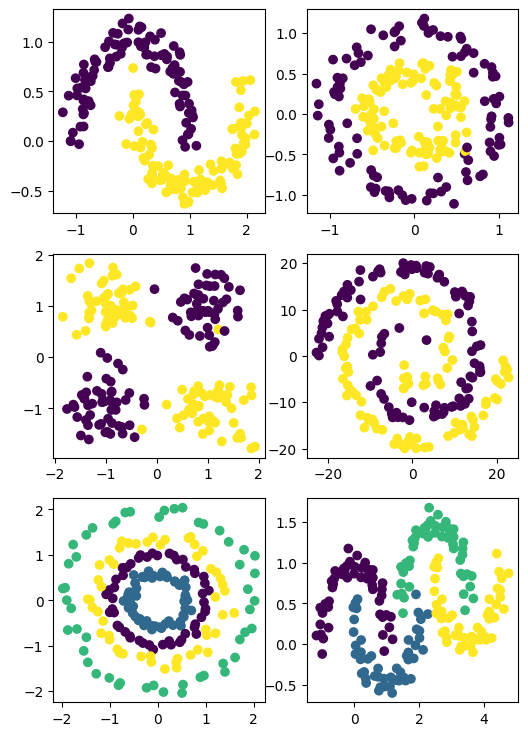

In [4]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.model_selection import train_test_split
import math

def generate_data(data_num, nsamples = 500, random_state = 0):
  if data_num == 0: # Two moons
    X,y  = make_moons(n_samples=nsamples, noise=0.1, random_state=random_state)
  elif data_num == 1: # Two circles
    X,y = make_circles(n_samples=nsamples, factor=0.5, noise=0.1, random_state=random_state)
  elif data_num == 2: # Two sets of two blobs
    X,y = make_blobs(n_samples=nsamples,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                     cluster_std=0.4, random_state=random_state)
    y = y//2
  elif data_num == 3: # Two spirals
    L = 3

    N = nsamples//2
    theta = np.sqrt(np.random.rand(N))*L*math.pi
    r_a = 2*theta + math.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = data_a + np.random.randn(N,2)
    res_a = np.append(x_a, np.zeros((N,1)), axis=1)

    N = nsamples - nsamples//2
    theta = np.sqrt(np.random.rand(N))*L*math.pi
    r_b = -2*theta - math.pi
    data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
    x_b = data_b + np.random.randn(N,2)
    res_b = np.append(x_b, np.ones((N,1)), axis=1)

    res = np.append(res_a, res_b, axis=0)
    np.random.shuffle(res)

    X = res[:,:2]
    y = res[:,2]
  elif data_num == 4: # Four circles
    X,y = make_circles(n_samples=nsamples//2, factor=0.6, noise=0.05, random_state=random_state)
    # ax[1,1].scatter(X[:, 0], X[:, 1], c=y)
    X2,y2 = make_circles(n_samples=nsamples - nsamples//2, factor=0.7, noise=0.05, random_state=random_state+1)
    X = np.vstack((X,2*X2))
    y = np.hstack((y,2+y2))
  elif data_num == 5: # Four moons
    X,y  = make_moons(n_samples=nsamples//2, noise=0.1, random_state=random_state)
    X2,y2  = make_moons(n_samples=nsamples-nsamples//2, noise=0.1, random_state=random_state)
    X2[:, 0] += 2.5
    X2[:, 1] += 0.5
    X = np.vstack((X,X2))
    y = np.hstack((y,2+y2))
  else:
    X,y = make_blobs(n_samples=nsamples,centers=[[1,1],[-1,-1]], cluster_std=0.9,random_state=random_state)

  return X,y

idataset = 0
X,y = generate_data(idataset, nsamples=200, random_state = 42)

#### Put a visualization code here
_, axs = plt.subplots(nrows = 3, ncols=2, sharex=False, sharey=False, figsize=(6, 9))

for i,ax in enumerate(axs.ravel()):
  X,y = generate_data(i, nsamples=200, random_state = 42)
  ax.scatter(X[:, 0], X[:, 1], c=y)


## Train and test sets in tensor format

The first activity is to use Pytorch to compute a linear classifier using a binary cross entropy loss on a simple problem.

The following code creates the train and test sets and transform it as tensors.

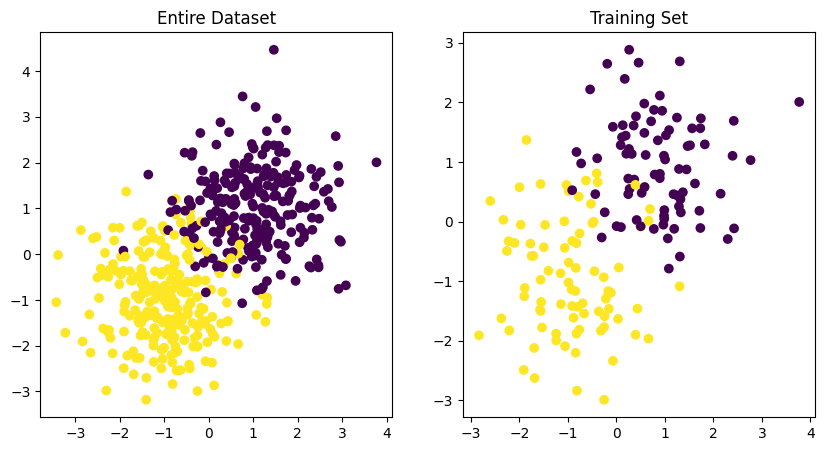

In [5]:
# dataset: two blobs
idataset = -1
X,y = generate_data(idataset, nsamples=500, random_state = 42)

# Create train and test sets as tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# We can transfer the dataset as the tensor
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
# Plotting the entire dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Entire Dataset")

# Plotting the training set
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Training Set")

plt.show()

## Network definition

In Pytorch, a network is defined as an object which inherits predefined methods used for learning (the [**`torch.nn.Module`**](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)).

In practice, you have to describe:
- The layers (defined as variables in the **`__init__`**)
- The architecture, i.e. the sequence of computations that yields the output from the input (the **`forward`** method).

You can refer to the documentation for more details, but it will be easier to show it works on examples.

<font color='red'>Question</font> study the following codes and comment it.



## We build a one layer with 2 neuros network

In [6]:
# Definition of a simple network
class NetworkExample(torch.nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(2,1)

    def forward(self, x):

        y = self.l1(x)

        return y

The network architecture is accessible using`state_dict()`.

<font color='red'>Question :</font> Execute the following cell and observe the result. Execute it a second time: what do you notice?



In [7]:
net = NetworkExample()
print(net.state_dict())

OrderedDict([('l1.weight', tensor([[-0.6388,  0.0785]])), ('l1.bias', tensor([0.1791]))])


## Learning phase

As described in class, the learning phase requires several complementary features to be defined once the network is created and intialized:
- the learning loss
- the gradient learning rate
- the data sampling strategy
- ...

The following cell provides a rather generic learning function adapted to binary classification.

<font color='red'>Question :</font> Read carefully the following cell to make sure that you understand all the steps.

In [8]:
# Learning phase
def model_trainer_binary(model, optimizer, data_train, epochs=5, verbose=True):

  train_pts = data_train[0]
  train_labels = data_train[1]

  # Epoch: the number of times we see the entire dataset
  num_epoch = epochs

  # optimizer creation
  optimizer = optimizer

  # loss criterion
  criterion = torch.nn.BCEWithLogitsLoss() # Here we can use our loss

  losses = []
  iterations = []
  total_iter_counter = 0
  for epoch in range(num_epoch):

      # set the network in training mode
      model.train()

      # create an iterator with progress bar
      t = tqdm(torch.randperm(train_pts.shape[0]))

      # variable to track the loss
      total_loss = 0

      epoch_iter_counter = 0

      # training loop
      for epoch_iter_counter,i in enumerate(t):

          # create the input / target tensors
          x = train_pts[i].reshape(1, 2)
          target = train_labels[i].reshape(1,1).float()

          # forward step
          y2 = model(x)

          # compute error loss
          loss = criterion(y2, target)

          # initialize the gradients to zero
          optimizer.zero_grad()

          # compute the backward pass
          loss.backward()

          # update the weights
          optimizer.step()

          # get the loss for the example and add it to the total loss
          total_loss += loss.item()
          #epoch_iter_counter += 1

          # print the average loss in the progress bar
          if verbose:
            t.set_description_str(f"Loss={total_loss/(1+epoch_iter_counter):.4e}")

          total_iter_counter += 1

      # Compute the loss over one epoch
      total_loss /= train_pts.shape[0]

      # Increment the loss sequence
      losses.append(total_loss)
      iterations.append(total_iter_counter)

  return (iterations, losses)


## Network optimization

Once the learning is defined, you haave to start the actual optimization to learn the weights.

<font color='red'>Question :</font> Run it the following cell and intepret the output.

Loss=1.2049e-01: 100%|██████████| 335/335 [00:00<00:00, 390.42it/s]


Text(0, 0.5, 'Loss')

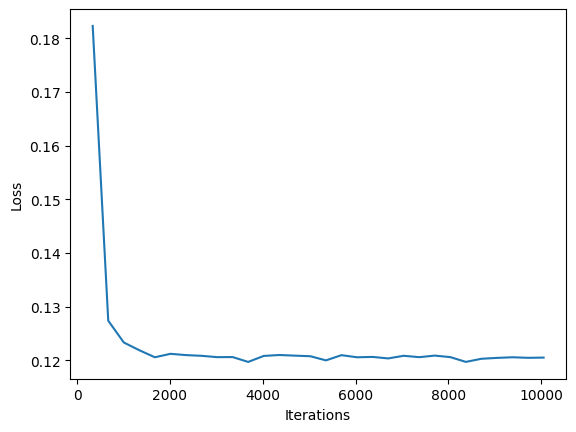

In [9]:
# Create the network
net = NetworkExample()

# Define the optimization strategy
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

# Learn and get the loss curves
learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=30, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])
plt.xlabel('Iterations')
plt.ylabel('Loss')


The following cell contains a function for displaying the decision surface once the network is learned.

<font color='red'>Question :</font> run the cell and verify that the network is performing well.

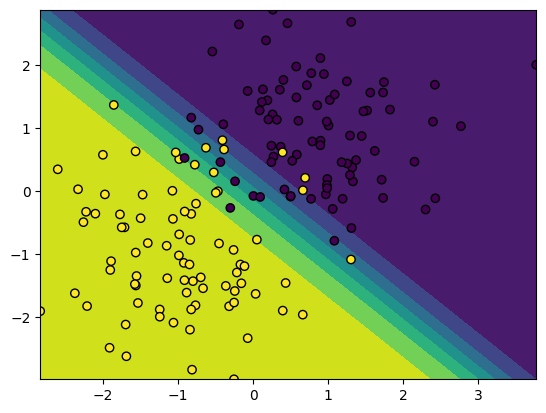

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay

###############################
# Function for displaying decision surface
def display_2D_boundary(model, # network
                        points, # Evaluation data (pts, labels)
                        head = None, # If a decision layer is needed
                        pred_show = False # Shows decision regions rather than score
                        ):

  model.eval()

  pt_min = points[0].min(0).values.numpy()
  pt_max = points[0].max(0).values.numpy()
  feature_1, feature_2 = np.meshgrid(np.linspace(pt_min[0],pt_max[0]),np.linspace(pt_min[1],pt_max[1]))

  grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
  grid_t = torch.tensor(grid, dtype=torch.float32)

  with torch.no_grad():
    if head is not None:
      grid_pred = head(model(grid_t)).detach()
    else:
      grid_pred = model(grid_t).detach()

  if pred_show:
      grid_pred = (grid_pred > 0.5).long()

  y_pred = np.reshape(grid_pred, feature_1.shape)

  display = DecisionBoundaryDisplay(xx0=feature_1,
                                    xx1=feature_2,
                                    response=y_pred)
  display.plot()

  display.ax_.scatter(points[0][:, 0], points[0][:, 1], c=points[1], edgecolor="black")
###########################

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Another dataset

We are going to study the same network on a different problem.

<font color='red'>Question</font>: apply the same code and visualization to the "two moons" problem (Number 0). What is the network behavior on this dataset?

Loss=2.5720e-01: 100%|██████████| 335/335 [00:00<00:00, 383.99it/s]


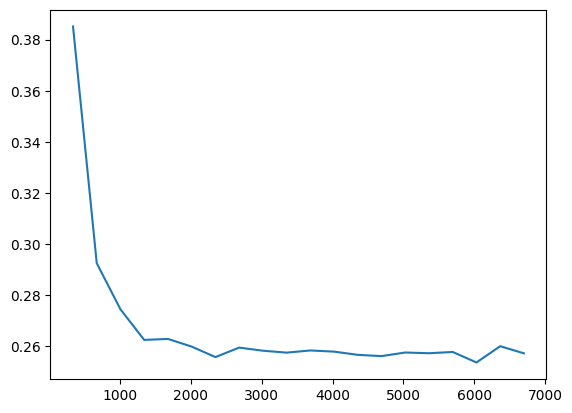

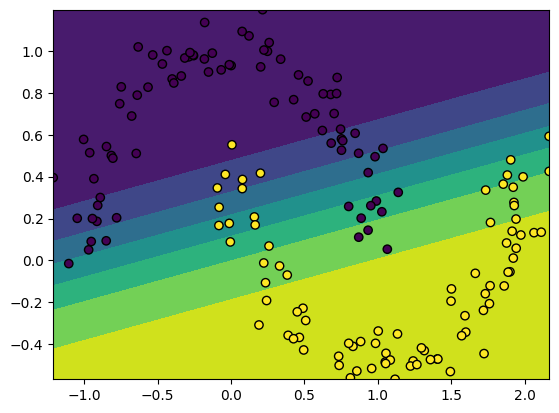

In [12]:
# dataset: two moons
idataset = 0
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create network
net = NetworkExample()

lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=20, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Adapt the architecture

A critical question when using neural networks is to find a good architecture that can approximate the decision function, but also that can be learned using gradient descent.

In this activity, we are going to change the network (as in the first part of the TD).

<font color='red'> Question :</font> Copy paste the previous code, and change the network definition to a two-linear-layer network. Activation function (between linear layers) are hyperbolic tangent functions (`torch.tanh`). The parameters of the network are the input size, the hidden size, and the output size. Train the newly defined network with datset 0 (the two moons) and dataset 1 (the two circles).
Comment on the choice of parameters (size of hidden layer, learning rate).

<font color='red'> Question :</font> Modify the network to take a ReLU (`torch.relu`) for activation function and relearn on the datasets. Is the learning behavior similar (speed, local minimum)?



In [13]:
# Definition of the network
class NetworkTwoLayers(torch.nn.Module):
    def __init__(self, in_size, hidden_size, out_size, activation = torch.tanh) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(in_size, hidden_size)
        # Define the second linear layer: from hidden layer size to output size
        self.l2 = torch.nn.Linear(hidden_size, out_size)
        # Store the activation function
        self.activation = activation

 ### Put your code here

    def forward(self, x):
 ### Put your code here
         # Pass input through the first layer and then apply the activation function
        x = self.activation(self.l1(x))
        # Pass the result through the second layer (no activation applied here, but you could if needed)
        y = self.l2(x)

        return y

In [20]:
# dataset
idataset = 0 # or 1 or 2
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create the network
net = NetworkTwoLayers(2, 8, 1, activation=torch.relu)


Loss=2.4747e-02: 100%|██████████| 335/335 [00:00<00:00, 345.41it/s]


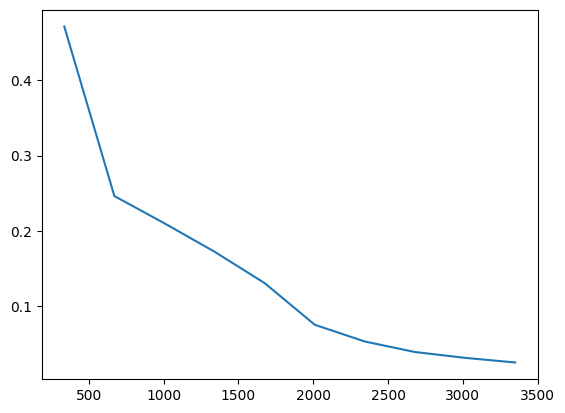

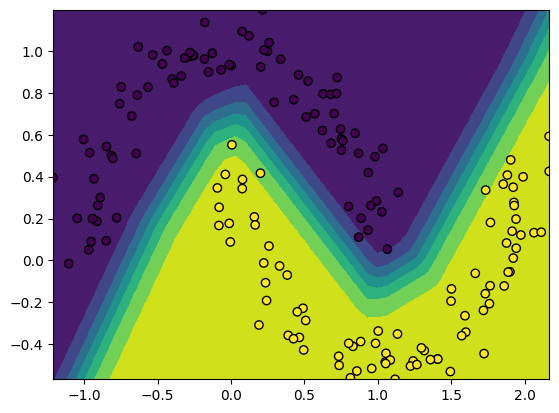

In [21]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=10, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Augment the number of layers

We are going to evaluate the impact of the number of layers in the architecture.

<font color='red'> Question :</font> compare the number of parameters (weights and biases) for an architecture containing two and three layers and the same number of hidden neurons $nh$. Plot the two curves with number of hidden layers as the x axis.

*Put your answer here*

- One hidden layer: $ (2 * nh + nh) + (nh + 1) = 4nh+1$
- Two hidden layers: $ (2*nh + nh) + (nh * nh + nh) + (nh+1) = nh^2+5nh+1$

Text(0, 0.5, 'Number of weights & biases')

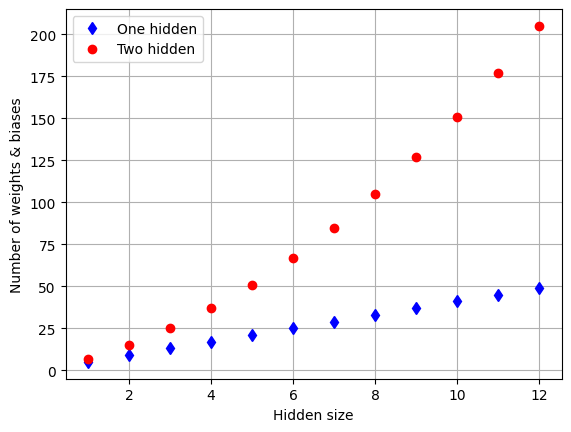

In [23]:
hsize = np.arange(1,13,1)

###### Put the number of parameters for the two network architectures
onelayer = [1]*12 # modify this
twolayer = [2]*12 # modify this

onelayer = 4 * hsize +1
twolayer = hsize**2 +5*hsize +1

plt.plot(hsize, onelayer, 'bd', label='One hidden')
plt.plot(hsize, twolayer, 'ro', label='Two hidden')
plt.legend()
plt.grid(True)
plt.xlabel('Hidden size')
plt.ylabel('Number of weights & biases')


<font color='red'> Question :</font> Compare the behavior of networks with one hidden layer and two hidden layers and a comparable total number of weights (use the previous question to find equivalences).


In [ ]:
# Network creation

class NetworkThreeLayers(torch.nn.Module):

    def __init__(self, in_size, hidden_size, out_size, activation = torch.tanh) -> None:
 ### Put your code here
        super().__init__()

    def forward(self, x):

        return y

In [ ]:
# dataset
idataset = 1 # or 0 or 2
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# First Network (three layers)
net = NetworkTwoLayers(...)

Loss=1.1855e-01: 100%|██████████| 335/335 [00:01<00:00, 267.58it/s]


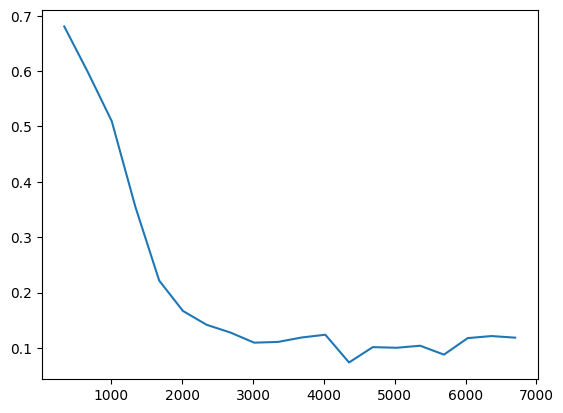

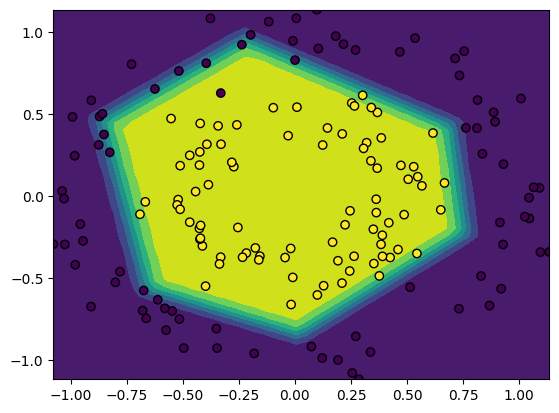

In [ ]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=20, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

In [ ]:
# Second network (Two layers)
net = NetworkTwoLayers(...)

Loss=7.4517e-02: 100%|██████████| 335/335 [00:00<00:00, 462.22it/s]


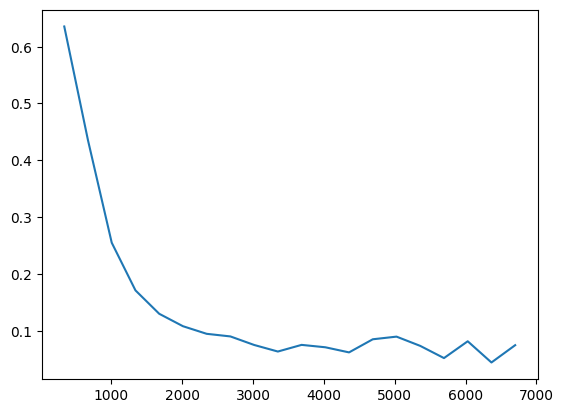

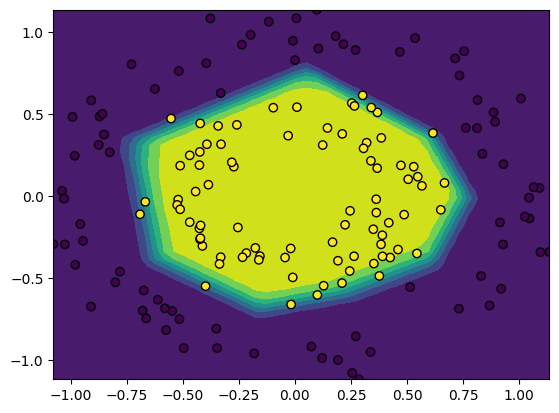

In [ ]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=20, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Learning parameters: batch size and momentum



### Batch size

We have seen in class that we can use batches of sample data to approximate the full gradient during the stochastic gradient descent.

<font color='red'>Question</font>: modify the following code for training  to use a mini-batch of size 16 instead of a single point for each gradient iteration. Then apply it on dataset 0 (two moons) and dataset 3 (spirals). Observe the behavior.

In [ ]:
def model_trainer_batch(model, optimizer, data_train, batch_size = 10, epochs=5, verbose=True):

  train_pts = data_train[0]
  train_labels = data_train[1]

  # Epoch: the number of times we see the entire dataset
  num_epoch = epochs

  # optimizer creation
  optimizer = optimizer

  # loss criterion
  criterion = torch.nn.BCEWithLogitsLoss()

  losses = []
  iterations = []
  total_iter_counter = 0
  for epoch in range(num_epoch):

      # set the network in training mode
      model.train()

      ############## Modify this part ################
      # create a data iterator with progress bar
      rand_ids = torch.randperm(train_pts.shape[0])
      t = tqdm(range(0, rand_ids.shape[0], batch_size))

      # variable to track the loss
      total_loss = 0

      epoch_iter_counter = 0

      # training loop
      for epoch_iter_counter,i in enumerate(t):

          ############## Modify this part ################
          # create the input / target tensors
          ids = rand_ids[i:i+batch_size]
          x = train_pts[ids]
          target = train_labels[ids].unsqueeze(1).float()

          # forward
          y2 = model(x)

          # compute error
          loss = criterion(y2, target)

          # initialize the gradients to zero
          optimizer.zero_grad()

          # compute the backward pass
          loss.backward()

          # update the weights
          optimizer.step()

          # get the loss for the example and add it to the total loss
          total_loss += loss.item()

          # print the average loss in the progress bar
          if verbose:
            t.set_description_str(f"Loss={total_loss/(1+epoch_iter_counter):.4e}")

          total_iter_counter += 1

      # Compute the loss over one epoch
      total_loss /= train_pts.shape[0]

      # Increment the loss sequence
      losses.append(total_loss)
      iterations.append(total_iter_counter)

  return (iterations, losses)


In [ ]:
# dataset: spiral
idataset = 3
# dataset: two moons
idataset = 0

X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create network
net = NetworkThreeLayers(2, 8, 1, activation=torch.relu)

Loss=4.2218e-02: 100%|██████████| 21/21 [00:00<00:00, 168.83it/s]


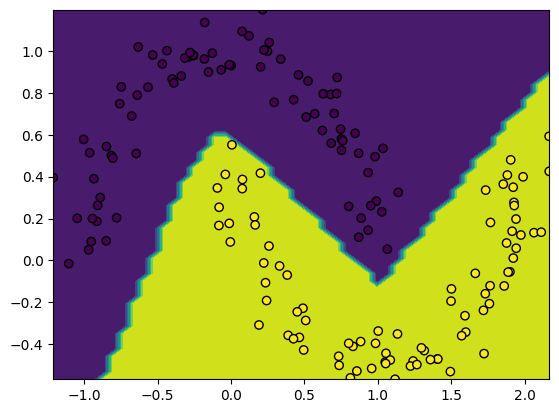

In [ ]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves_batch = model_trainer_batch(net, optimizer, (train_pts, train_labels),
              batch_size = 16, epochs=40, verbose=True)

# display the decision surface
display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = True)

### Adding a momentum

Depending on the batch size, the gradient descent may be unstable.

One solution is to increase the batch size (see previous) but depending on the problem it may not be always possible.

Another approach is to use **momentum** during the optimization.

$$v_t = \gamma v_{t-1} + (1-\gamma) \Delta w $$
$$w_t = w_{t-1} + \alpha v_t $$

We will see in the next class other strategies for controling the learning rate.

<font color='red'>Question</font>: what is the intuition behing momentum?

*answer here (double click on the cell)*

<font color='red'>Question</font>: modify the code to use momentum. In PyTorch, it is an optimizer parameter.

<font color='red'>Question</font>: plot the loss curves for mini-batch 1, mini-batch 16 and mini-batch 16 with momentum. Comment the results.

In [ ]:
# Create and initialize network
net = NetworkThreeLayers(2, 8, 1, activation=torch.relu)


Loss=2.1199e-04: 100%|██████████| 335/335 [00:01<00:00, 177.55it/s]


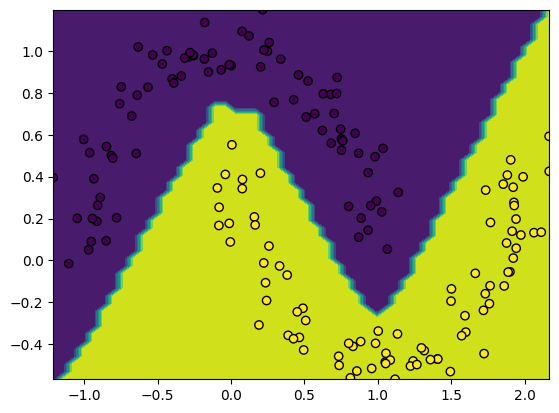

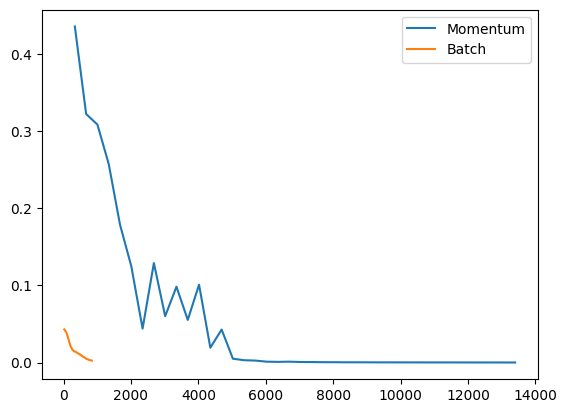

In [ ]:
### Modify the code here
# Optimization
lr = 1e-1
optimizer = ...

learning_curves_momentum = model_trainer_batch(net, optimizer, (train_pts, train_labels),
              batch_size = 1, epochs=40, verbose=True)

# display the decision surface
display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves_momentum[0], learning_curves_momentum[1], label='Momentum')
plt.plot(learning_curves_batch[0], learning_curves_batch[1], label='Batch')
plt.legend()


## Comparison with SVM

We have seen in a previous class the versatility of SVM for small dimension problems. Run the following cell

<font color='red'>Question</font>: can you compare the two strategies for learning the "spiral" distribution?

Best score = 1.00 with kernel rbf
Parameters are gamma = 0.17 and C = 0.215443


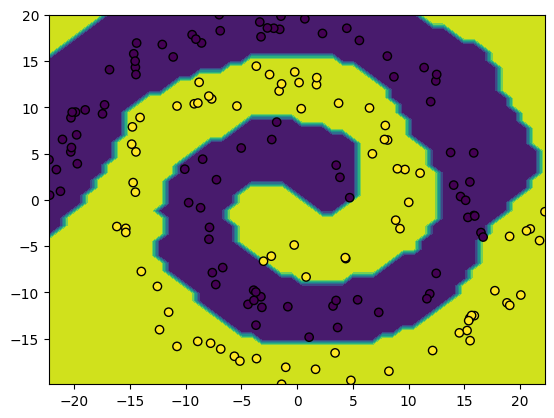

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# dataset: spiral
idataset = 3
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base classifier for cross-validation
svc = svm.SVC(shrinking=True,max_iter=1000000) # max_iter = 1000000 pour limiter les non convergences de l'optimiseur

# Cross validation
parameters = [{'kernel':['rbf'],
              'C':np.logspace(-2, 2, 7),
              'gamma':np.logspace(-3, 2, 10)}]

clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(X_train, y_train)

# Result of the cross-validation
bestsvc = clf.best_estimator_

print("Best score = {:.2f} with kernel {}".format(clf.best_score_, bestsvc.kernel))
print("Parameters are gamma = {:.2g} and C = {:2g}".format(bestsvc.gamma, bestsvc.C))

# Display decision surfaces
pt_min = X_test.min(0)
pt_max = X_test.max(0)
feature_1, feature_2 = np.meshgrid(np.linspace(pt_min[0],pt_max[0]),np.linspace(pt_min[1],pt_max[1]))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

y_pred = bestsvc.predict(grid)
y_pred = np.reshape(y_pred, feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1,
                                    xx1=feature_2,
                                    response=y_pred)
display.plot()

display.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="black")


## Multi-label classification

One of the big advantages of neural network is to solve the multiple class problem using a unique loss to optimize. We give in the following a series of cells abel to solve the multiclass problem.

<font color='red'>Question</font>: Run the cells and analyze the differeences and similarities with the previous codes adapted to binary classification.

In [ ]:
def model_trainer_batch_multilabel(model, optimizer, data_train, batch_size = 10, epochs=5, verbose=True):

  train_pts = data_train[0]
  train_labels = data_train[1]

  # Epoch: the number of times we see the entire dataset
  num_epoch = epochs

  # optimizer creation
  optimizer = optimizer

  # loss criterion
  criterion = torch.nn.CrossEntropyLoss()

  losses = []
  iterations = []
  total_iter_counter = 0
  for epoch in range(num_epoch):

      # set the network in training mode
      model.train()

      # create an iterator with progress bar
      rand_ids = torch.randperm(train_pts.shape[0])
      t = tqdm(range(0, rand_ids.shape[0], batch_size))

      # variable to track the loss
      total_loss = 0

      epoch_iter_counter = 0

      # training loop
      for epoch_iter_counter,i in enumerate(t):

          # create the input / target tensors
          ids = rand_ids[i:i+batch_size]
          x = train_pts[ids]
          target = train_labels[ids].long()

          # forward
          y2 = model(x)

          # compute error
          loss = criterion(y2, target)

          # initialize the gradients to zero
          optimizer.zero_grad()

          # compute the backward pass
          loss.backward()

          # update the weights
          optimizer.step()

          # get the loss for the example and add it to the total loss
          total_loss += loss.item()

          # print the average loss in the progress bar
          if verbose:
            t.set_description_str(f"Loss={total_loss/(1+epoch_iter_counter):.4e}")

          total_iter_counter += 1

      total_loss /= train_pts.shape[0]
      losses.append(total_loss)
      iterations.append(total_iter_counter)

  return (iterations, losses)


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

###############################
# Function for displaying decision surface
def display_2D_multilabel(model, # network
                        points # Evaluation data
                        ):

  model.eval()

  pt_min = points[0].min(0).values.numpy()
  pt_max = points[0].max(0).values.numpy()
  feature_1, feature_2 = np.meshgrid(np.linspace(pt_min[0],pt_max[0]),np.linspace(pt_min[1],pt_max[1]))

  grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
  grid_t = torch.tensor(grid, dtype=torch.float32)

  with torch.no_grad():
    pred_test = net(grid_t)
    grid_pred = torch.argmax(pred_test,1)

  y_pred = np.reshape(grid_pred, feature_1.shape)

  display = DecisionBoundaryDisplay(xx0=feature_1,
                                    xx1=feature_2,
                                    response=y_pred)
  display.plot()

  display.ax_.scatter(points[0][:, 0], points[0][:, 1], c=points[1], edgecolor="black")
###########################


In [ ]:
# Four moons dataset
idataset = 5
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create network
net = NetworkThreeLayers(2, 8, 4, activation=torch.tanh)


Loss=2.0218e-03: 100%|██████████| 21/21 [00:00<00:00, 169.23it/s]


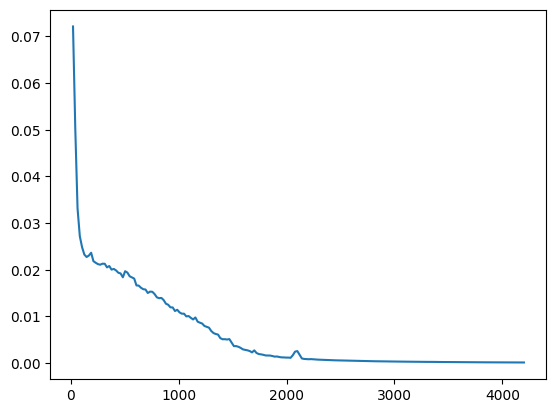

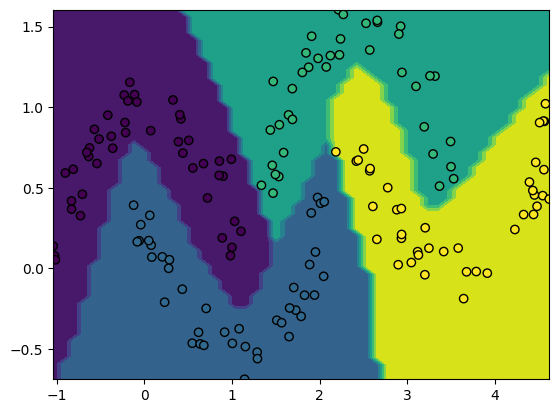

In [ ]:

lr = 1e-1; optimizer = torch.optim.SGD(net.parameters(), lr)

# An adaptive learning rate strategy
lr = 1e-2; optimizer = torch.optim.Adam(net.parameters(), lr)

learning_curves = model_trainer_batch_multilabel(net, optimizer, (train_pts, train_labels),
              batch_size = 16, epochs=200, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

# display the decision surface
display_2D_multilabel(net, (test_pts, test_labels))